In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [118]:
# !curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


In [119]:
df = pd.read_csv('laptops.csv')
df.shape

(2160, 12)

In [120]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [121]:
# prepare the dataset 
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [122]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [123]:
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


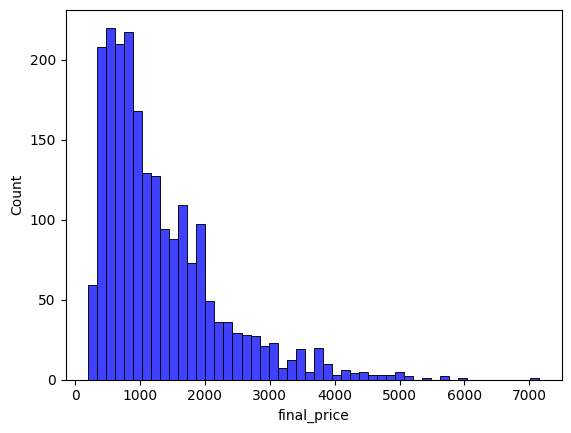

In [124]:
# EDA
sns.histplot(data = df_new['final_price'],bins = 50,color= 'blue')
plt.xlabel='final_price'
plt.ylabel = 'count'
plt.show()

## Question 1
There's one column with missing values. What is it?

In [125]:
df_new.isna().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

screen column has 4 missing values

## Question 2
What's the median (50% percentile) for variable 'ram'?

In [126]:
df_new.ram.median()

16.0

In [127]:
def split_dataframe(df_new):
    # split the dataset
    df_train = df_new.sample(frac=0.6,random_state=42)
    remaining_df = df_new.drop(df_train.index)

    # print(df_train.shape)
    # print(remaining_df.shape)

    df_val = remaining_df.sample(frac = 0.5, random_state=45)
    remaining_df = remaining_df.drop(df_val.index)

    # print(df_val.shape)
    # print(remaining_df.shape)

    df_test = remaining_df
    # print(f'size of train set: {df_train.shape}, size of val set: {df_val.shape}, size of test set: {df_test.shape}')
    return df_train,df_val, df_test

In [128]:
df_new['screen'] = df_new.screen.fillna(0)
df_new['screen'].isna().sum()

0

In [129]:
# prepare_X 
def prepare_Xy(df):
    X = df.drop('final_price', axis=1).values
    bias = np.ones(df.shape[0])
    X = np.column_stack((bias,X)) 
    y = df['final_price'].values
    return X,y

X,y = prepare_Xy(df_new)
X

array([[   1. ,    8. ,  512. ,   15.6],
       [   1. ,    8. ,  256. ,   15.6],
       [   1. ,    8. ,  256. ,   15.6],
       ...,
       [   1. ,   32. , 1000. ,   17.3],
       [   1. ,   16. , 1000. ,   13.4],
       [   1. ,   16. ,  256. ,   13.4]])

In [130]:
def linear_regression_model(X,y):
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    XtX_inv = np.linalg.inv(XtX)
    w = XtX_inv.dot(Xt).dot(y)
    w0 = w[0]
    return w0, w

In [131]:
def rmse(y_pred, y_true):
    rmse_value = np.sqrt(np.mean(np.square(y_pred - y_true)))
    return rmse_value

In [136]:
# NAs replaced with mean of the column
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new['screen'] = df_new['screen'].fillna(0)

# fit the regression model on train set
df_train,df_val, df_test = split_dataframe(df_new)
X_train,y_train = prepare_Xy(df_train)
# print(X_train.shape)
# print(y_train.shape)
w0,w = linear_regression_model(X_train,y_train)
# print(w0)
# print(w)



# predictions on val set
X_val,y_val = prepare_Xy(df_val)
# print(X_val.shape,y_val.shape)
y_pred_val = np.dot(X_val,w)
# print(y_pred_val.shape)
score = rmse(y_pred_val,y_val)
print('rmse error calculated when NA values in screen column replaced with ZERO:',score.round(2))




rmse error calculated when NA values in screen column replaced with ZERO: 573.79


In [138]:
# NAs replaced with mean of the column
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new['screen'] = df_new['screen'].fillna(np.mean(df_new['screen']))

# fit the regression model on train set
df_train,df_val, df_test = split_dataframe(df_new)
X_train,y_train = prepare_Xy(df_train)
# print(X_train.shape)
# print(y_train.shape)
w0,w = linear_regression_model(X_train,y_train)
# print(w0)
# print(w)



# predictions on val set
X_val,y_val = prepare_Xy(df_val)
# print(X_val.shape,y_val.shape)
y_pred_val = np.dot(X_val,w)
# print(y_pred_val.shape)
score = rmse(y_pred_val,y_val)
print('rmse error calculated when NA values in screen column replaced with MEAN:',score.round(2))

rmse error calculated when NA values in screen column replaced with MEAN: 574.65


## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [144]:
def regularized_linear_regression_model(X,y,r):
    Xt = np.transpose(X)
    XtX = np.dot(Xt,X)
    alpha = np.eye(XtX.shape[0])*r
    XtX_alpha = XtX+alpha
    XtX_inv = np.linalg.inv(XtX_alpha)
    w = XtX_inv.dot(Xt).dot(y)
    w0 = w[0]
    return w0, w

In [149]:
# NAs replaced with mean of the column
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new['screen'] = df_new['screen'].fillna(0)

reg_list = [0, 0.01, 0.1, 1, 5, 10, 100]
for r in reg_list:

    # fitting regularized linear regression model on train data
    df_train,df_val, df_test = split_dataframe(df_new)
    X_train,y_train = prepare_Xy(df_train)
    w0,w = regularized_linear_regression_model(X_train,y_train,r)
    
    # predictions on val set
    X_val,y_val = prepare_Xy(df_val)
    # print(X_val.shape,y_val.shape)
    y_pred_val = np.dot(X_val,w)
    # print(y_pred_val.shape)
    score = rmse(y_pred_val,y_val)
    print(f'rmse error with regularized term: {r} is {score.round(2)}')


rmse error with regularized term: 0 is 573.79
rmse error with regularized term: 0.01 is 573.78
rmse error with regularized term: 0.1 is 573.75
rmse error with regularized term: 1 is 573.47
rmse error with regularized term: 5 is 572.74
rmse error with regularized term: 10 is 572.37
rmse error with regularized term: 100 is 571.93


## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

In [150]:
def split_dataframe(df_new, s):
    # split the dataset
    df_train = df_new.sample(frac=0.6,random_state = s)
    remaining_df = df_new.drop(df_train.index)

    # print(df_train.shape)
    # print(remaining_df.shape)

    df_val = remaining_df.sample(frac = 0.5, random_state = s)
    remaining_df = remaining_df.drop(df_val.index)

    # print(df_val.shape)
    # print(remaining_df.shape)

    df_test = remaining_df
    # print(f'size of train set: {df_train.shape}, size of val set: {df_val.shape}, size of test set: {df_test.shape}')
    return df_train,df_val, df_test

In [163]:
# NAs replaced with mean of the column
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new['screen'] = df_new['screen'].fillna(0)

seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

score = []
for s in seed_values:

    # fitting  linear regression model on train data
    df_train,df_val, df_test = split_dataframe(df_new,s)
    X_train,y_train = prepare_Xy(df_train)
    w0,w = linear_regression_model(X_train,y_train)
    
    # predictions on val set
    X_val,y_val = prepare_Xy(df_val)
    # print(X_val.shape,y_val.shape)
    y_pred_val = np.dot(X_val,w)
    # print(y_pred_val.shape)
    score.append(rmse(y_pred_val, y_val)) 

print(np.std(score).round(3))


33.38


## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?


In [168]:
# NAs replaced with mean of the column
df_new = df[['ram','storage','screen','final_price']].copy(deep= True)
df_new['screen'] = df_new['screen'].fillna(0)

# fitting regularized linear regression model on train data
df_train,df_val, df_test = split_dataframe(df_new,s =9)
X_train,y_train = prepare_Xy(df_train)
w0,w = regularized_linear_regression_model(X_train,y_train,r = 0.001)

# predictions on val set
X_val,y_val = prepare_Xy(df_val)
# print(X_val.shape,y_val.shape)
y_pred_val = np.dot(X_val,w)
# print(y_pred_val.shape)
score = rmse(y_pred_val,y_val)
print(f'rmse error on validation set is with regularized term: {0.001} is {score.round(2)}')


# predictions on test set
X_test,y_test = prepare_Xy(df_test)
# print(X_val.shape,y_val.shape)
y_pred_test = np.dot(X_test,w)
# print(y_pred_val.shape)
score = rmse(y_pred_test,y_val)
print(f'rmse error on Test set is with regularized term: {0.001} is {score.round(2)}')

rmse error on validation set is with regularized term: 0.001 is 584.2
rmse error on Test set is with regularized term: 0.001 is 1167.71
